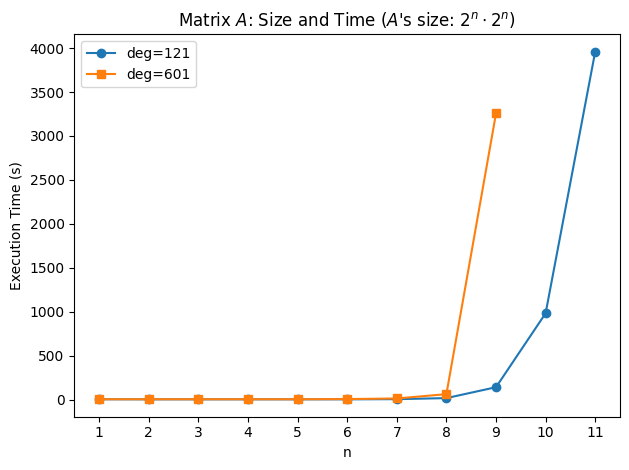

In [64]:
import matplotlib.pyplot as plt
import numpy as np

n_range = np.arange(start=1, stop=11 + 1)
# n_range = np.array((list(range(1, 12))))
time_deg121 = [4, 3, 3, 3, 3, 3, 5, 17, 141, 982, 3959]
time_deg601 = [4, 4, 4, 4, 4, 6, 13, 62, 3256, None, None]

bar_width = 0.2

# Create the line chart with data points
# plt.bar(n_range, time_deg121, width=bar_width, label='deg=121')
# plt.bar(n_range + bar_width, time_deg601, width=bar_width, label='deg=601')

plt.plot(n_range, time_deg121, label='deg=121', marker='o')
plt.plot(n_range, time_deg601, label='deg=601', marker='s')


# Add labels and title
plt.xlabel('n')
plt.ylabel('Execution Time (s)')
plt.title('Matrix $A$: Size and Time ($A$\'s size: $2^n\cdot2^n$)')

plt.xticks(n_range)

# Add a legend
plt.legend()
plt.tight_layout()

# Display the chart
plt.show()


kappa: [ 6.4  1.9  3.1 28.1  7.  11.4 28.  79.2 34.3 78.9 75.5]


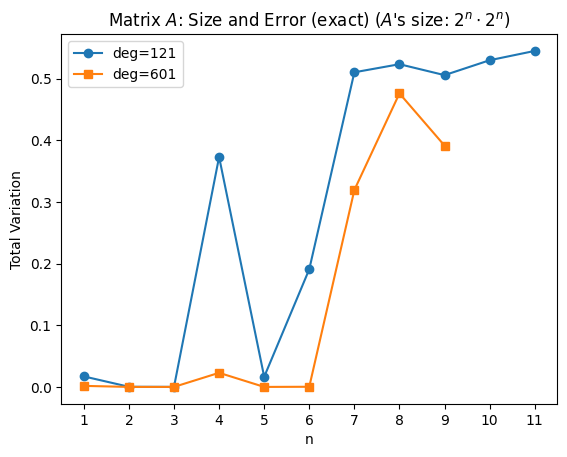

In [65]:
TV_deg121 = [
    0.01707399165950635,
    0.00023764842040387146,
    8.046272666280491e-05,
    0.37300360176881797,
    0.016425810472915227,
    0.19093535657522087,
    0.5103886755445334,
    0.5235268715869992,
    0.5057704183177396,
    0.5299579531824377,
    0.5450613489867535
]

TV_deg601 = [
    0.0016978734019000852,
    2.9763211045859966e-05,
    9.954737152238075e-06,
    0.022896537864351165,
    4.417869614955836e-06,
    0.0002584977850328715,
    0.3194577153592469,
    0.47614980130335893,
    0.39144361410401207,
    None, 
    None
]

kappa = [
    6.438816080560334,
    1.8834239777011659,
    3.129002778062557,
    28.058449141710366,
    7.0385708652698655,
    11.3573900173322,
    28.033050731120934,
    79.15594034690965,
    34.27889705792397,
    78.884284361191,
    75.45554474050736
]

kappa = np.round(kappa, 1)
print(f'kappa: {kappa}')


# Create the line chart with data points
plt.plot(n_range, TV_deg121, label='deg=121', marker='o')
plt.plot(n_range, TV_deg601, label='deg=601', marker='s')
# plt.plot(n_range, y_values_3, label='Line 3', marker='^')

# Intentional to plot kappa, but looks confusing.
# for x, y in zip(n_range, TV_deg121):
#     if y is not None:
#         id = n_range.index(x)
#         plt.text(x, y, kappa[id], ha='left', va='bottom')

# for x, y in zip(n_range, time_deg121):
#     if y is not None:
#         plt.text(x, y, str(y), ha='center', va='bottom')

# Add labels and title
plt.xlabel('n')
plt.ylabel('Total Variation')
plt.title('Matrix $A$: Size and Error (exact) ($A$\'s size: $2^n\cdot2^n$)')

plt.xticks(n_range)

# Add a legend
plt.legend()

# Display the chart
# plt.show()


In [66]:
import re

N, D = 13, 4
# N, D = 1, 0
TV_exact, TV_sample, Succ_ratio = [[[] for __ in range(D + 1)] for _ in range(3)]
Prepare_qc_time, Sample_time, Exe_time = [[[] for __ in range(D + 1)] for _ in range(3)]

for d in range(D + 1):
    for n in range(1, N + 1):
        with open(f'./results_self_sample/{n}q-nAA-{d}.txt', 'r') as f:
            data = f.read()
            # print(data)

            # deg = re.findall("deg: (.*)", data)[0]
            tv_exact = re.findall("total_variation \(exact\): (.*)", data)[0]
            tv_sample = re.findall("total_variation \(sample\): (.*)", data)[0]
            succ_ratio = re.findall("sucess ratio: (.*)", data)[0]

            prepare_qc_time = re.findall("prepare circuit spends: (.*) sec", data)[0]
            sample_time = re.findall("sampling time: (.*) sec", data)[0]
            exe_time = re.findall("total execution time \(exclude snapshot\): (.*) sec", data)[0]

            # Deg.append(deg)
            TV_exact[d].append(float(tv_exact))
            TV_sample[d].append(float(tv_sample))
            Succ_ratio[d].append(float(succ_ratio))

            Prepare_qc_time[d].append(float(prepare_qc_time))
            Sample_time[d].append(float(sample_time))
            Exe_time[d].append(float(exe_time))

            # print(deg, tv_exact, tv_sample, succ_ratio, prepare_qc_time, sample_time, exe_time)


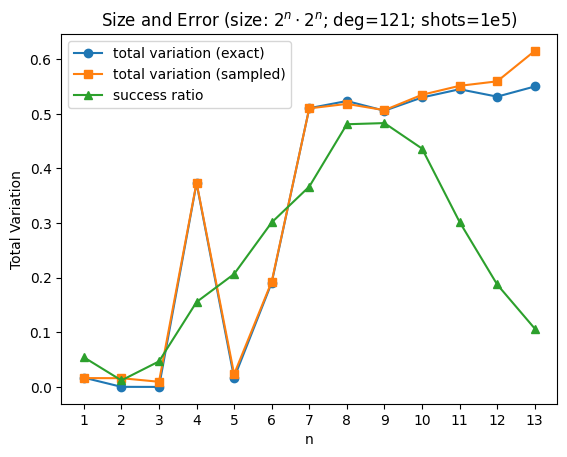

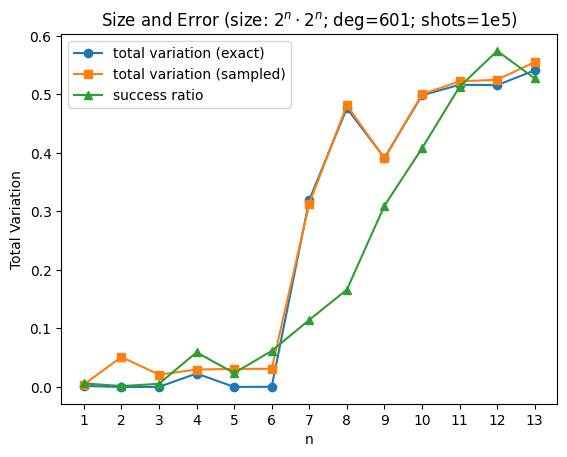

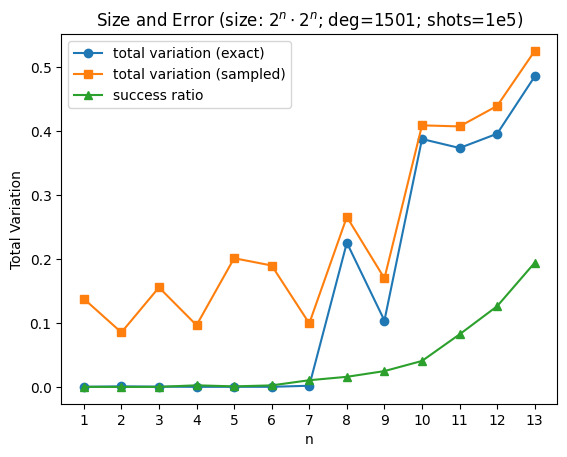

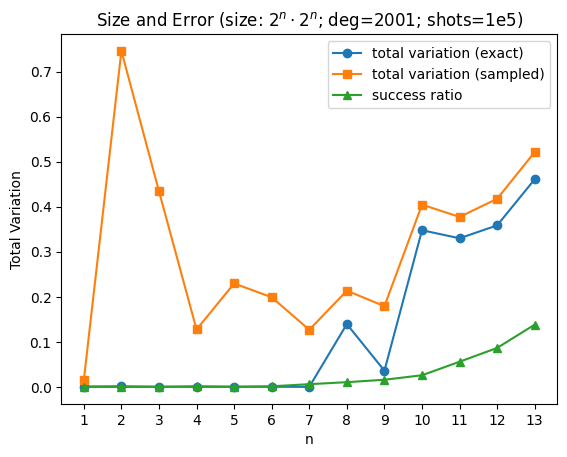

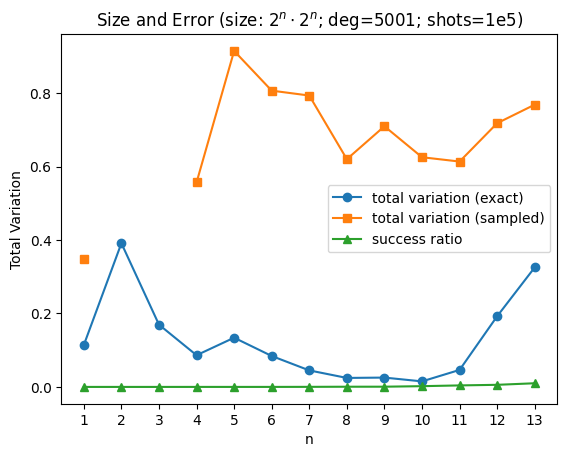

In [72]:
n_range = list(range(1, N + 1))
deg_list = [121, 601, 1501, 2001, 5001]

for d in range(D + 1):
    plt.plot(n_range, TV_exact[d], label='total variation (exact)', marker='o')
    plt.plot(n_range, TV_sample[d], label='total variation (sampled)', marker='s')
    plt.plot(n_range, Succ_ratio[d], label='success ratio', marker='^')

    plt.xlabel('n')
    plt.ylabel('Total Variation')
    plt.title(f'Size and Error (size: $2^n\cdot2^n$; deg={deg_list[d]}; shots=1e5)')

    plt.xticks(n_range)

    # Add a legend
    plt.legend()

    plt.savefig(f'./plot_self_sample/size_error_d{deg_list[d]}.png', format='png')
    plt.show()


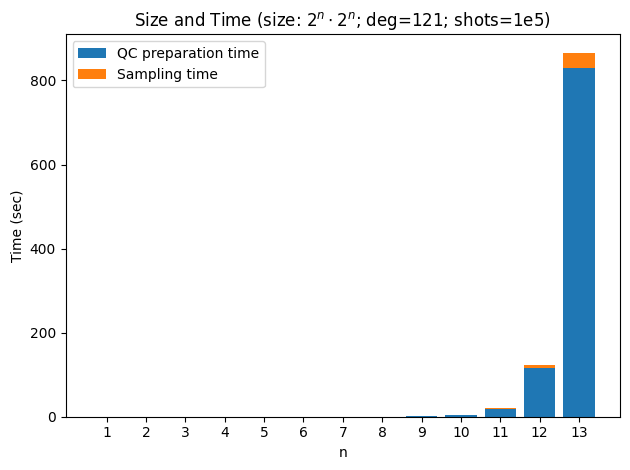

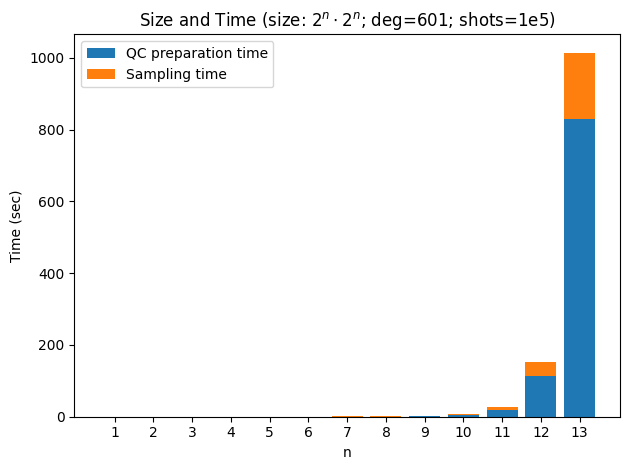

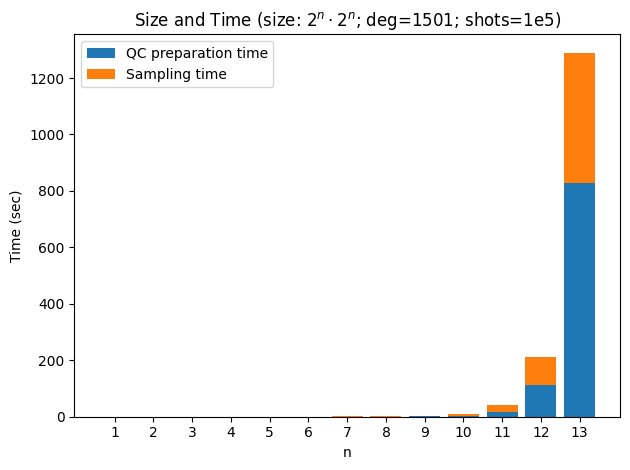

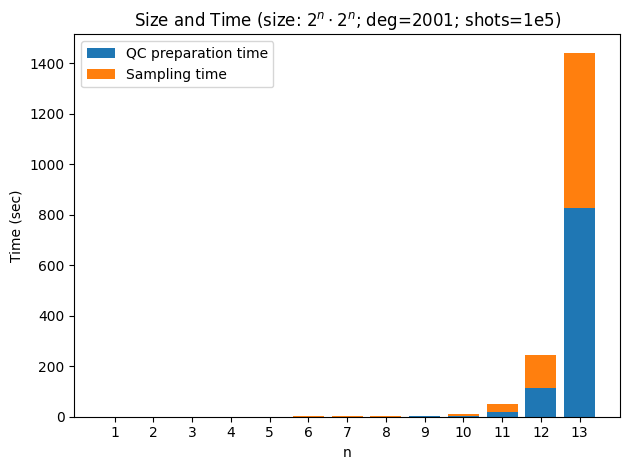

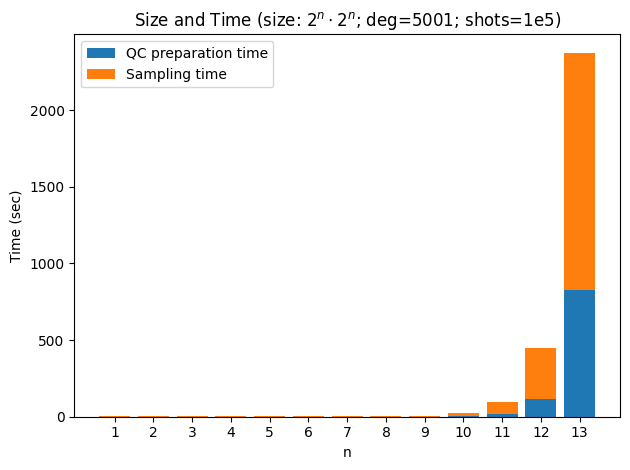

In [73]:
for d in range(D + 1):
    # Create the stacked bar chart
    plt.bar(n_range, Prepare_qc_time[d], label='QC preparation time')
    plt.bar(n_range, Sample_time[d], bottom=Prepare_qc_time[d], label='Sampling time')

    # Add labels and title
    plt.xlabel('n')
    plt.ylabel('Time (sec)')
    plt.title(f'Size and Time (size: $2^n\cdot2^n$; deg={deg_list[d]}; shots=1e5)')
    plt.xticks(n_range)
    plt.legend()

    # Display the chart
    plt.tight_layout()
    plt.savefig(f'./plot_self_sample/size_time_d{deg_list[d]}.png', format='png')
    plt.show()